# **Loan Approval Prediction with ML Models**

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifierCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline

## Loading the dataset

In [ ]:
path = "/content/Loan_Data.csv"
loan_data = pd.read_csv(path)

In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Understanding the data

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='LoanAmount', ylabel='Count'>

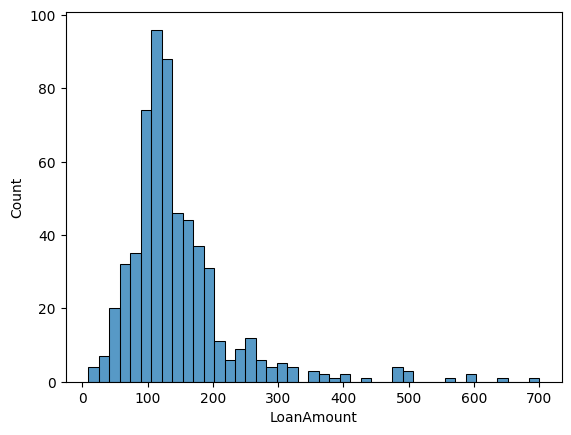

In [ ]:
sns.histplot(loan_data['LoanAmount'])

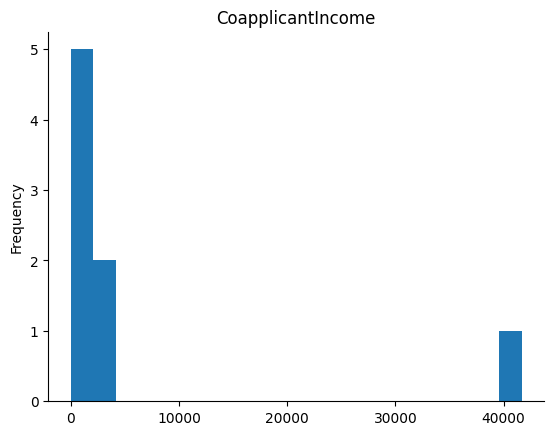

In [ ]:
from matplotlib import pyplot as plt
_df_1['CoapplicantIncome'].plot(kind='hist', bins=20, title='CoapplicantIncome')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Correlation Between Variables

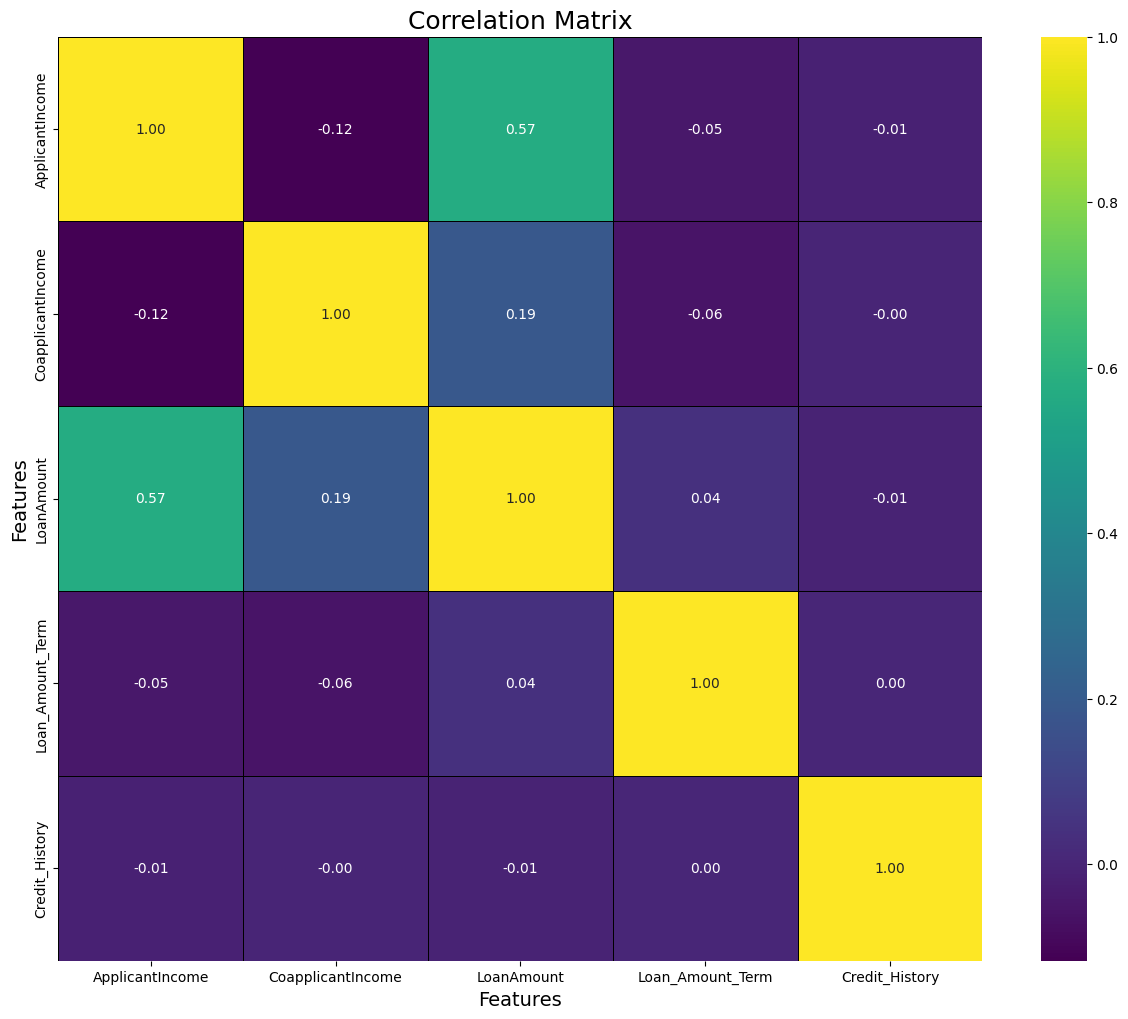

In [ ]:
# Calculate the correlation matrix
correlation_matrix = loan_data.corr(numeric_only=True)

# Create a heatmap figure with specified size (in inches)
plt.figure(figsize=(15, 12))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis',
            linewidths=0.5, linecolor='black', square=True,
            fmt=".2f")

# Add a title to the plot
plt.title('Correlation Matrix', fontsize=18)

# Set the x-axis and y-axis labels
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Display the heatmap
plt.show()

# Replacing null values

Replacing null values of Categorical variables with it's Mode

In [ ]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0],inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0],inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0],inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0],inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0],inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0],inplace=True)

Replacing null values of Numerical variable with median

In [ ]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(),inplace=True)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Ensuring all the null values are replaced with it's median and mode respectively

In [ ]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Differentiating Categorical and numerical columns

In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


## Basic descriptive graphs of the categorical columns with respective to Loan amount

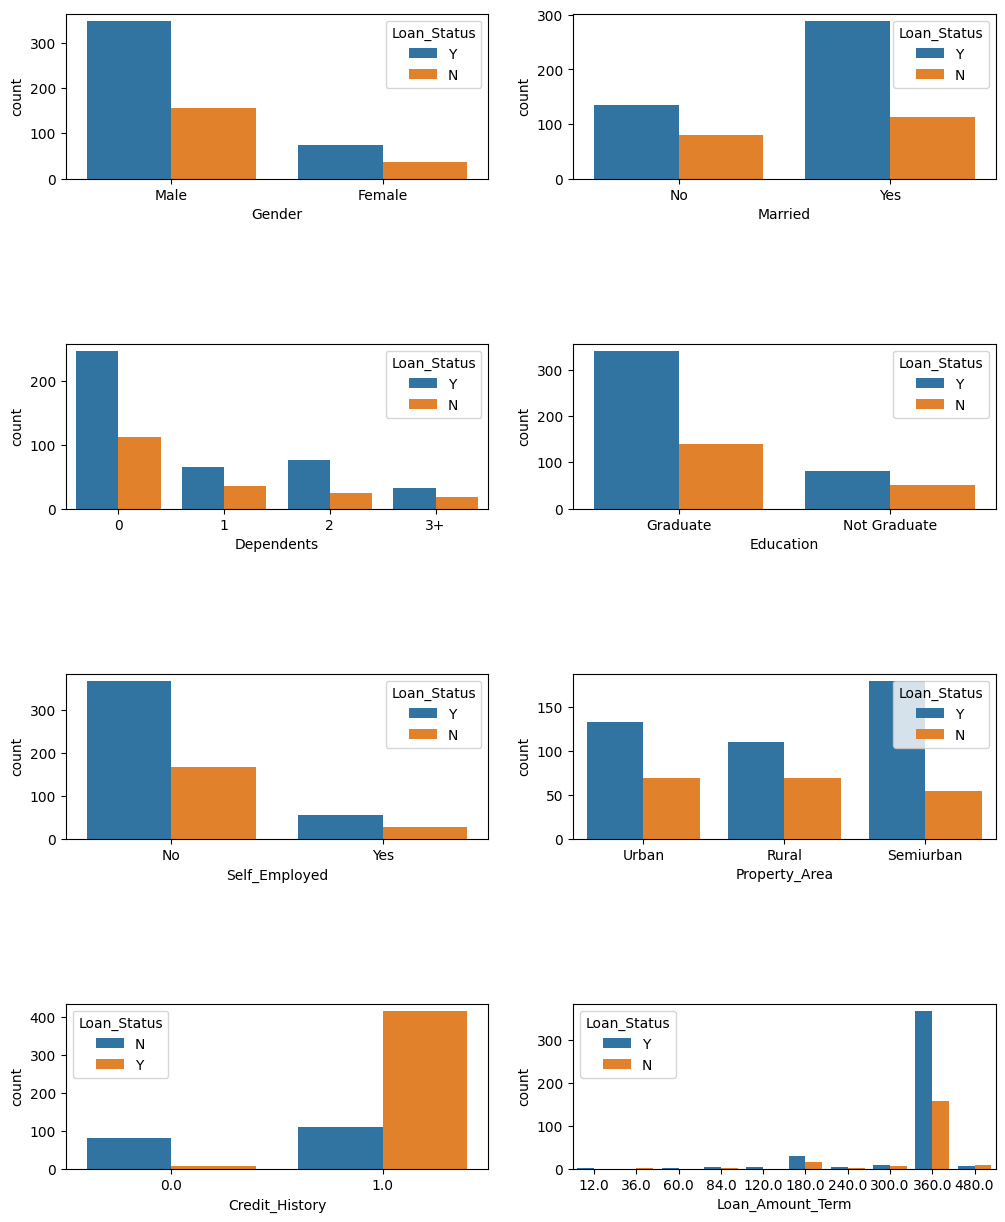

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

## Recoding the categorical variables as dummies

###    recoding variables into numericals, because ML models cannot intake object.

In [ ]:
loan_data.replace({'Married':{'No':0,'Yes':1}, 'Loan_Status':{'N':0, 'Y':1}, 'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_data = loan_data.replace(to_replace='3+', value=4)
loan_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1


Dropping Loan_ID as it doesn't require for prediction process

In [ ]:
loan_data = loan_data.drop(columns=['Loan_ID'])

# Defining Features and Targets

In [ ]:
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

## Splitting the data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# **Machine Learning Models**

# 1) Random Forest Classifier

In [ ]:
# Initialize and train the model
RandomForestClassifier_model = RandomForestClassifier(random_state=72)
RandomForestClassifier_model.fit(X_train, y_train)

# Make predictions
y_pred = RandomForestClassifier_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

[[19 15]
 [ 8 81]]
Accuracy: 0.8130081300813008
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        34
           1       0.84      0.91      0.88        89

    accuracy                           0.81       123
   macro avg       0.77      0.73      0.75       123
weighted avg       0.81      0.81      0.81       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Random Forest Classifier', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = RandomForestClassifier_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of Random Forest Classifier', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

# Plot feature importance
importances = RandomForestClassifier_model.feature_importances_
feature_names = X.columns
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_names, y=importances, name='Feature Importance'))
fig.update_layout(title='Feature Importance of Random Forest Classifier', xaxis_title='Feature', yaxis_title='Importance')
fig.show()

# 2) Decision Tree Classifier

In [ ]:
# Initialize and train the model
DecisionTreeClassifier_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=72)
DecisionTreeClassifier_model.fit(X_train, y_train)

# Make predictions
y_pred = DecisionTreeClassifier_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

[[14 20]
 [ 4 85]]
Accuracy: 0.8048780487804879
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.41      0.54        34
           1       0.81      0.96      0.88        89

    accuracy                           0.80       123
   macro avg       0.79      0.68      0.71       123
weighted avg       0.80      0.80      0.78       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Decision Tree Classifier', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = DecisionTreeClassifier_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of of Decision Tree Classifier', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

# Plot feature importance
importances = DecisionTreeClassifier_model.feature_importances_
feature_names = X.columns
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_names, y=importances, name='Feature Importance'))
fig.update_layout(title='Feature Importance of of Decision Tree Classifier', xaxis_title='Feature', yaxis_title='Importance')
fig.show()

# 3) Logistic Regression

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Select the top k features using mutual information
selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_pca, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=72)

# Define the pipeline with hyperparameter tuning
pipe = Pipeline([
    ('logistic', LogisticRegression(random_state=72, solver='liblinear'))  # Using 'liblinear' solver
])

param_grid = {
    'logistic__C': [0.1, 1, 10],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__max_iter': [500, 1000, 2000]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
logreg_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'logistic__C': 0.1, 'logistic__max_iter': 500, 'logistic__penalty': 'l1'}
Confusion Matrix:
[[16 18]
 [ 1 88]]
Accuracy: 0.8455284552845529
AUC-ROC: 0.7296761401189689
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        34
           1       0.83      0.99      0.90        89

    accuracy                           0.85       123
   macro avg       0.89      0.73      0.77       123
weighted avg       0.86      0.85      0.83       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Logistic Regression', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of Logistic Regression', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

importances = logreg_model.named_steps['logistic'].coef_[0]
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_names, y=importances, name='Feature Importance'))
fig.update_layout(title='Feature Importance of of Logistic Regression', xaxis_title='Feature', yaxis_title='Importance')
fig.show()

# 4) K Neighbors Classifier

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter tuning space for KNeighborsClassifier
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best-performing model and its hyperparameters
KNeighborsClassifier_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

# Train the best model on the entire training set
KNeighborsClassifier_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred =KNeighborsClassifier_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'uniform'}
Accuracy: 0.8373983739837398
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        34
           1       0.83      0.98      0.90        89

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.76       123
weighted avg       0.85      0.84      0.82       123

Confusion Matrix:
[[16 18]
 [ 2 87]]


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of K Neighbors Classifier', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = KNeighborsClassifier_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of of K Neighbors Classifier', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

In [ ]:
# Train the best model on the entire training set (assuming KNeighborsClassifier_model is already trained)
KNeighborsClassifier_model.fit(X_train, y_train)

# Get feature importance using permutation importance
perm_importance = permutation_importance(KNeighborsClassifier_model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = X.columns

# Prepare data for plotting
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std

# Create a Plotly bar plot for feature importance
fig = go.Figure()
fig.add_trace(go.Bar(
    x=feature_names,
    y=importances_mean,
    error_y=dict(type='data', array=importances_std),
    marker_color='firebrick',
    opacity=0.7,
    name='Feature Importance'
))
fig.update_layout(
    title='Feature Importance of K Neighbors Classifier',
    xaxis_title='Feature',
    yaxis_title='Importance',
    showlegend=True
)
fig.show()


# 5) Support Vector Machine

In [ ]:
# Initialize and train the model
SVC_model = SVC(random_state=72, kernel='linear', C=1.0)
SVC_model.fit(X_train, y_train)

# Make predictions
y_pred = SVC_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print accuracy, precision, and recall
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[16 18]
 [ 1 88]]
Accuracy: 0.8455284552845529
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        34
           1       0.83      0.99      0.90        89

    accuracy                           0.85       123
   macro avg       0.89      0.73      0.77       123
weighted avg       0.86      0.85      0.83       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of SVM', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = SVC_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of SVM', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

In [ ]:
# Get feature importances (coefficients)
importances = SVC_model.coef_[0]

# Get feature names
feature_names = X.columns

# Create a Plotly bar plot for feature importance
fig = go.Figure()
fig.add_trace(go.Bar(
    x=feature_names,
    y=importances,
    marker_color='blue',
    opacity=0.7,
    name='Feature Importance'
))
fig.update_layout(
    title='Feature Importance of SVM',
    xaxis_title='Feature',
    yaxis_title='Importance',
    showlegend=True
)
fig.show()

# 6) Gradient Boosting Classifier


In [ ]:
# Initialize and train the GBM model
gbm = GradientBoostingClassifier(random_state=72)
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

[[20 14]
 [ 5 84]]
Accuracy: 0.8455284552845529
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.59      0.68        34
           1       0.86      0.94      0.90        89

    accuracy                           0.85       123
   macro avg       0.83      0.77      0.79       123
weighted avg       0.84      0.85      0.84       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Gradient Boosting Classifier', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = gbm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of Gradient Boosting Classifier', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

# Plot feature importance
feature_names = X.columns
importances = gbm.feature_importances_
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_names, y=importances, name='Feature Importance'))
fig.update_layout(title='Feature Importance of Gradient Boosting Classifier', xaxis_title='Feature', yaxis_title='Importance')
fig.show()

# 7) Gaussian Naive Bayes

In [ ]:
# Define features and target
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Initialize and train the model
Gaussian_model = GaussianNB()
Gaussian_model.fit(X_train, y_train)

# Make predictions
y_pred = Gaussian_model.predict(X_test)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

[[18 16]
 [ 5 84]]
Accuracy: 0.8292682926829268
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.53      0.63        34
           1       0.84      0.94      0.89        89

    accuracy                           0.83       123
   macro avg       0.81      0.74      0.76       123
weighted avg       0.82      0.83      0.82       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Gaussian Naive Bayes', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = Gaussian_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of Gaussian Naive Bayes', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

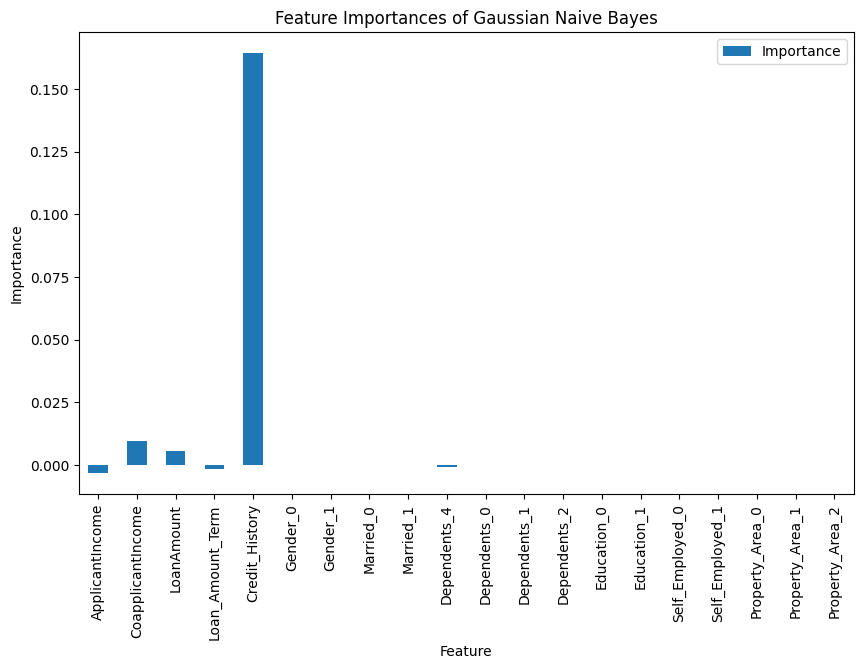

In [ ]:
# Calculate permutation importance
importances = permutation_importance(Gaussian_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances.importances_mean})


# Plot the feature importances using a bar chart
importance_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Feature Importances of Gaussian Naive Bayes')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# 8) Ridge Classifier CV

In [ ]:
# Initialize and train the model with Ridge Classifier CV
RidgeClassifierCV_model = RidgeClassifierCV(alphas=[0.1, 1.0, 10.0], cv=5, scoring='accuracy')
RidgeClassifierCV_model.fit(X_train, y_train)

# Make predictions
y_pred = RidgeClassifierCV_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

[[17 17]
 [ 1 88]]
Accuracy: 0.8536585365853658
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.50      0.65        34
           1       0.84      0.99      0.91        89

    accuracy                           0.85       123
   macro avg       0.89      0.74      0.78       123
weighted avg       0.87      0.85      0.84       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Ridge Classifier CV', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = RidgeClassifierCV_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of Ridge Classifier CV', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

# Plot feature importance
feature_names = X.columns
coefs = RidgeClassifierCV_model.coef_[0]
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_names, y=coefs, name='Feature Importance'))
fig.update_layout(title='Feature Importance of Ridge Classifier CV', xaxis_title='Feature', yaxis_title='Importance')
fig.show()

# 9) Bernoulli Naive Bayes

In [ ]:
# Define features and target
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Initialize and train the model
Bernoulli_model = BernoulliNB(binarize=0.0, class_prior=None, fit_prior=True)
Bernoulli_model.fit(X_train, y_train)

# Make predictions
y_pred = Bernoulli_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

[[20 14]
 [ 4 85]]
Accuracy: 0.8536585365853658
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        34
           1       0.86      0.96      0.90        89

    accuracy                           0.85       123
   macro avg       0.85      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Bernoulli Naive Bayes', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = Bernoulli_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of Bernoulli Naive Bayes', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

In [ ]:
# Visualize feature importance (log probabilities)
feature_names = X.columns
log_probabilities = Bernoulli_model.feature_log_prob_[1]  # Log probabilities for class 1 (assuming binary classification)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=feature_names,
    y=np.exp(log_probabilities),  # Convert log probabilities to probabilities
    name='Feature Importance of Bernoulli',
    marker_color='blue'
))
fig.update_layout(
    title='Feature Importance for BernoulliNB Model',
    xaxis_title='Feature',
    yaxis_title='Importance (Probability)',
    showlegend=True
)
fig.show()


# 10) Adaptive Boosting Classifier

In [ ]:
# Define the base estimators
dt = DecisionTreeClassifier(random_state=72)
lr = LogisticRegression(random_state=72)
svm = SVC(probability=True, random_state=72)
rf = RandomForestClassifier(random_state=72)

# Create a list of base estimators
base_estimators = [dt, lr, svm, rf]

# Initialize and train the AdaBoost model for each base estimator
ada_models = []
for estimator in base_estimators:
    ada_model = AdaBoostClassifier(estimator=estimator, n_estimators=100, random_state=72)
    ada_model.fit(X_train, y_train)
    ada_models.append(ada_model)

# Make predictions for each AdaBoost model
y_pred_ada = []
for model in ada_models:
    y_pred = model.predict(X_test)
    y_pred_ada.append(y_pred)

# Evaluate each AdaBoost model
for i, y_pred in enumerate(y_pred_ada):
    print(f"AdaBoost with {base_estimators[i].__class__.__name__}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print()


AdaBoost with DecisionTreeClassifier:
Confusion Matrix:
[[18 16]
 [19 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        34
           1       0.81      0.79      0.80        89

    accuracy                           0.72       123
   macro avg       0.65      0.66      0.65       123
weighted avg       0.72      0.72      0.72       123

Accuracy: 0.7154471544715447

AdaBoost with LogisticRegression:
Confusion Matrix:
[[18 16]
 [ 2 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.53      0.67        34
           1       0.84      0.98      0.91        89

    accuracy                           0.85       123
   macro avg       0.87      0.75      0.79       123
weighted avg       0.86      0.85      0.84       123

Accuracy: 0.8536585365853658

AdaBoost with SVC:
Confusion Matrix:
[[ 8 26]
 [ 0 89]]
Classification Report:
              p

In [ ]:
# Evaluate each AdaBoost model
for i, y_pred in enumerate(y_pred_ada):
    print(f"AdaBoost with {base_estimators[i].__class__.__name__} accuracy: {accuracy_score(y_test, y_pred)}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create interactive confusion matrix using Plotly
    fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                      annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
    fig.update_layout(title=f'Normalized Confusion Matrix - AdaBoost with {base_estimators[i].__class__.__name__}', xaxis_title='Predicted label', yaxis_title='True label')
    fig.show()

    # Plot ROC Curve
    y_pred_proba = ada_models[i].predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
    fig.update_layout(title=f'ROC Curve - AdaBoost with {base_estimators[i].__class__.__name__}', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
    fig.show()

    # Plot feature importance (only for tree-based models)
    if isinstance(base_estimators[i], (DecisionTreeClassifier, RandomForestClassifier)):
        feature_names = X.columns
        feature_importances = ada_models[i].feature_importances_
        fig = go.Figure()
        fig.add_trace(go.Bar(x=feature_names, y=feature_importances, name='Feature Importance'))
        fig.update_layout(title=f'Feature Importance - AdaBoost with {base_estimators[i].__class__.__name__}', xaxis_title='Feature', yaxis_title='Importance')
        fig.show()

AdaBoost with DecisionTreeClassifier accuracy: 0.6666666666666666


AdaBoost with LogisticRegression accuracy: 0.7967479674796748


AdaBoost with SVC accuracy: 0.7235772357723578


AdaBoost with RandomForestClassifier accuracy: 0.7886178861788617


# 11) Voting Classifier

In [ ]:
# Initialize the classifiers
dt = DecisionTreeClassifier(random_state=72)
lr = LogisticRegression(max_iter=1000, solver='saga', random_state=72)  # Increased max_iter and changed solver
svm = SVC(probability=True, random_state=72)
rf = RandomForestClassifier(random_state=72)

# Create a list of tuples, where each tuple contains the name of the estimator and the estimator itself
estimators = [('dt', dt), ('lr', lr), ('svm', svm), ('rf', rf)]

# Create a pipeline for each estimator that includes scaling
dt_pipeline = make_pipeline(StandardScaler(), dt)
lr_pipeline = make_pipeline(StandardScaler(), lr)
svm_pipeline = make_pipeline(StandardScaler(), svm)
rf_pipeline = make_pipeline(StandardScaler(), rf)

# Initialize and train the VotingClassifier
voting_model = VotingClassifier(estimators=[('dt', dt_pipeline), ('lr', lr_pipeline), ('svm', svm_pipeline), ('rf', rf_pipeline)], voting='soft')
voting_model.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_model.predict(X_test)

# Evaluate the VotingClassifier
conf_mat = confusion_matrix(y_test, y_pred_voting)
print("Confusion Matrix:")
print(conf_mat)
class_report = classification_report(y_test, y_pred_voting)
print("Classification Report:")
print(class_report)
print(f"VotingClassifier accuracy: {accuracy_score(y_test, y_pred_voting)}")


Confusion Matrix:
[[16 18]
 [ 7 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        34
           1       0.82      0.92      0.87        89

    accuracy                           0.80       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.79      0.80      0.78       123

VotingClassifier accuracy: 0.7967479674796748


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Voting Classifier', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba_voting = voting_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_voting)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of Voting Classifier', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

In [ ]:
# Feature importance analysis for each base model
fig = go.Figure()

for name, estimator in voting_model.named_estimators_.items():
    if hasattr(estimator, 'coef_'):  # Check if the estimator has 'coef_' attribute (e.g., LogisticRegression)
        importances = np.abs(estimator.coef_[0])
    elif hasattr(estimator, 'feature_importances_'):  # Check if the estimator has 'feature_importances_' attribute (e.g., RandomForestClassifier)
        importances = estimator.feature_importances_
    else:
        # For estimators like DecisionTreeClassifier, consider feature importance based on feature importance ranking
        importances = np.ones(len(X.columns))  # Placeholder for uniform importance

    # Normalize importances for better comparison
    importances = importances / np.sum(importances)

    feature_names = X.columns
    fig.add_trace(go.Bar(
        x=feature_names,
        y=importances,
        name=f'{name} Feature Importance',
        marker_color=np.random.choice(['salmon', 'honeydew', 'whitesmoke', 'red'])
    ))

fig.update_layout(
    title='Normalized Feature Importance for VotingClassifier Base Models',
    xaxis_title='Feature',
    yaxis_title='Normalized Importance',
    barmode='group',
    showlegend=True
)

fig.show()



# 12) Extra Trees Classifier

In [ ]:
# Initialize and train the model
ExtraTreesClassifier_model = ExtraTreesClassifier(random_state=72)
ExtraTreesClassifier_model.fit(X_train, y_train)

# Make predictions
y_pred = ExtraTreesClassifier_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

[[17 17]
 [11 78]]
Accuracy: 0.7723577235772358
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        34
           1       0.82      0.88      0.85        89

    accuracy                           0.77       123
   macro avg       0.71      0.69      0.70       123
weighted avg       0.76      0.77      0.77       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Extra Trees Classifier', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = ExtraTreesClassifier_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of Extra Trees Classifier', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

# Plot feature importance
importances = ExtraTreesClassifier_model.feature_importances_
feature_names = X.columns
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_names, y=importances, name='Feature Importance'))
fig.update_layout(title='Feature Importance of Extra Trees Classifier', xaxis_title='Feature', yaxis_title='Importance')
fig.show()

# 13) Multi-layer Perceptron Classifier

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the model with more hidden layers and neurons
MLPClassifier_model = MLPClassifier(hidden_layer_sizes=(200, 100, 50), activation='relu', max_iter=1000, random_state=72)
MLPClassifier_model.fit(X_train, y_train)

# Make predictions
y_pred = MLPClassifier_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

[[17 17]
 [14 75]]
Accuracy: 0.7479674796747967
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        34
           1       0.82      0.84      0.83        89

    accuracy                           0.75       123
   macro avg       0.68      0.67      0.68       123
weighted avg       0.74      0.75      0.74       123



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of MLP Classifier', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = MLPClassifier_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of MLP Classifier', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

# Plot feature importance
importances = MLPClassifier_model.coefs_[0].sum(axis=0)
feature_names = X.columns
fig = go.Figure()
fig.add_trace(go.Bar(x=feature_names, y=importances, name='Feature Importance'))
fig.update_layout(title='Feature Importance of MLP Classifier', xaxis_title='Feature', yaxis_title='Importance')
fig.show()

# 14) Bagging Classifier

In [ ]:
# Define base models with LogisticRegression having increased max_iter
base_models = [
    DecisionTreeClassifier(random_state=72),
    LogisticRegression(random_state=72, max_iter=1000),
    SVC(probability=True, random_state=72),
    GaussianNB(),
]

# Initialize and train the bagging classifier for each base model
for base_model in base_models:
    # Create a pipeline for models that need scaling
    if isinstance(base_model, (LogisticRegression, SVC)):
        pipeline = make_pipeline(StandardScaler(), BaggingClassifier(base_model, n_estimators=100, random_state=72))
    else:
        pipeline = BaggingClassifier(base_model, n_estimators=100, random_state=72)

    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print("Base Model:", base_model.__class__.__name__)
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()


Base Model: DecisionTreeClassifier
[[17 17]
 [ 9 80]]
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.50      0.57        34
           1       0.82      0.90      0.86        89

    accuracy                           0.79       123
   macro avg       0.74      0.70      0.71       123
weighted avg       0.78      0.79      0.78       123


Base Model: LogisticRegression
[[17 17]
 [ 1 88]]
Accuracy: 0.8536585365853658
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.50      0.65        34
           1       0.84      0.99      0.91        89

    accuracy                           0.85       123
   macro avg       0.89      0.74      0.78       123
weighted avg       0.87      0.85      0.84       123


Base Model: SVC
[[17 17]
 [ 2 87]]
Accuracy: 0.8455284552845529
Classification Report:
              precision    recall  f1-score   sup

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title=f'Normalized Confusion Matrix - Bagging with {base_model.__class__.__name__}', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = BaggingClassifier_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title=f'ROC Curve - Bagging with {base_model.__class__.__name__}', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

# 15) Stacking Classifier

In [ ]:
# Define base models
base_models = [
    ('DecisionTree', DecisionTreeClassifier(random_state=72)),
    ('LogisticRegression', make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', random_state=72))),
    ('SVC', make_pipeline(StandardScaler(), SVC(probability=True, random_state=72))),
    ('GaussianNB', make_pipeline(StandardScaler(), GaussianNB())),
]

# Define the final estimator
final_estimator = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='saga', random_state=72))

# Initialize and train the stacking classifier
StackingClassifier_model = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)
StackingClassifier_model.fit(X_train, y_train)

# Make predictions
y_pred = StackingClassifier_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[16 18]
 [ 2 87]]
Accuracy: 0.8373983739837398
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        34
           1       0.83      0.98      0.90        89

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.76       123
weighted avg       0.85      0.84      0.82       123



In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create interactive confusion matrix using Plotly
fig = ff.create_annotated_heatmap(z=cm_normalized, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'],
                                  annotation_text=np.around(cm_normalized, 2), colorscale='Blues')
fig.update_layout(title='Confusion Matrix of Stalking Classifier', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

# Plot ROC Curve
y_pred_proba = StackingClassifier_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Chance'))
fig.update_layout(title='ROC Curve of Stalking Classfier', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

In [ ]:
# Feature importance analysis for each base model (if applicable)
fig = go.Figure()

for name, estimator in StackingClassifier_model.named_estimators_.items():
    if hasattr(estimator, 'coef_'):  # Check if the estimator has 'coef_' attribute (e.g., LogisticRegression)
        importances = np.abs(estimator.coef_[0])
    elif hasattr(estimator, 'feature_importances_'):  # Check if the estimator has 'feature_importances_' attribute (e.g., RandomForestClassifier)
        importances = estimator.feature_importances_
    else:
        importances = np.ones(len(X.columns))  # Placeholder for uniform importance

    feature_names = X.columns
    fig.add_trace(go.Bar(
        x=feature_names,
        y=importances,
        name=f'{name} Feature Importance',
        marker_color=np.random.choice(['salmon', 'cornflowerblue', 'silver', 'firebrick'])
    ))

fig.update_layout(
    title='Feature Importance for StackingClassifier Base Models',
    xaxis_title='Feature',
    yaxis_title='Importance',
    barmode='group',
    showlegend=True
)

fig.show()


Out of these 15 models Logistic Regression and Support Vector Machine turns out to be the best models, as they both predict with 85% accuracy so now we are going to build a predictive system based on these models.

# Logistic Regression Predictive System

In [ ]:
#Define the input data
input_data = ['Male', 'Yes', 2, 'Graduate', 'No', 3200, 700, 70, 360, 1, 'Urban']

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Define the replacement values
replacement_values = {'No': 0, 'Yes': 1, 'Male': 1, 'Female': 0, 'Rural': 0, 'Semiurban': 1,
                      'Urban': 2, 'Graduate': 1, 'Not Graduate': 0}

# Replace the specified values with the corresponding replacement values
input_data_reshaped = np.where(np.isin(input_data_reshaped, list(replacement_values.keys())),
                               [[replacement_values.get(item, item) for item in row] for row in input_data_reshaped],
                               input_data_reshaped)

# Scale the input data
input_data_scaled = scaler.transform(input_data_reshaped)

# Apply PCA to the input data
input_data_pca = pca.transform(input_data_scaled)

# Select the top k features for the input data
input_data_selected = selector.transform(input_data_pca)

# Perform the prediction
prediction = logreg_model.predict(input_data_selected)
print(prediction)

if prediction[0] == 1:
    print('Loan Approved')
else:
    print('Loan not approved')

[1]
Loan Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



# Support Vector Machine Predictive System

In [ ]:
# Define the input data
input_data = [1, 0, 2, 0, 0, 3200, 700, 70, 360, 1, 0]

# Reshape the input data
input_data = np.array(input_data).reshape(1, -1)

# Perform the prediction
prediction = SVC_model.predict(input_data)
print(prediction)

if prediction[0] == 'Y':
    print('Loan Approved')
else:
    print('Loan not approved')

[1]
Loan not approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

